## 1 Predict delivery time using Simple linear regression - Delivery time dataset

* Delivery_time -> Predict delivery time using sorting time 

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### The Data

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [8]:
df1= df.rename({'Delivery Time':'dlt','Sorting Time':'slt'},axis=1)
df1.head()

,dlt,slt
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='dlt', ylabel='slt'>

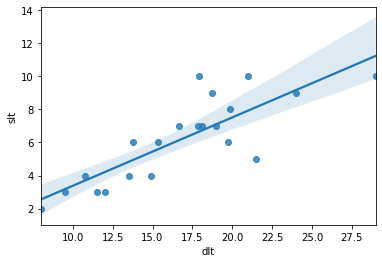

In [9]:
sns.regplot(x='dlt',y='slt',data=df1)

<AxesSubplot:ylabel='dlt'>

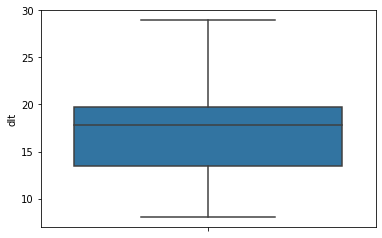

In [10]:
sns.boxplot(y=df1['dlt'])

<AxesSubplot:xlabel='dlt', ylabel='slt'>

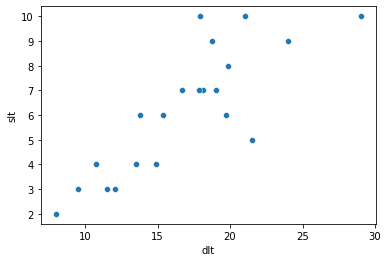

In [11]:
sns.scatterplot(x='dlt',y='slt',data=df1)

### Models with diffrent Transformations

In [12]:
# no transformations

model1 = smf.ols('dlt~slt',data=df1).fit()
model1.rsquared

0.6822714748417231

In [13]:
# log transformation on dependent variable

model2 = smf.ols('np.log(dlt)~slt',data=df1).fit()
model2.rsquared

0.7109478980584187

In [14]:
# log transformation on independent variable

model3 = smf.ols('dlt~np.log(slt)',data=df1).fit()
model3.rsquared

0.6954434611324223

In [15]:
# log transformation 

model4 = smf.ols('np.log(dlt)~np.log(slt)',data=df1).fit()
model4.rsquared

0.77216134926874

In [16]:
# square root transformation on dependent variable

model5 = smf.ols('np.sqrt(dlt)~slt',data=df1).fit()
model5.rsquared

0.704049871541756

In [17]:
# square root transformation on independent variable

model6 = smf.ols('dlt~np.sqrt(slt)',data=df1).fit()
model6.rsquared

0.6958062276308671

In [18]:
# square root transformation

model7 = smf.ols('np.sqrt(dlt)~np.sqrt(slt)',data=df1).fit()
model7.rsquared

0.7292011987544664

In [19]:
# reciprocal transformation on dependent var

model8 = smf.ols('np.reciprocal(dlt)~slt',data=df1).fit()
model8.rsquared

0.6816508639250471

### Choosing a model with best performance

In [20]:
model_obj = [model1,model2,model3,model4,model5,model6,model7,model8]
models = ['model1','model2','model3','model4','model5','model6','model7','model8']
rsqr_df = pd.DataFrame(models,columns=['model'])

In [21]:
rsqr_df['r_squared'] = [x.rsquared for x in model_obj] 

In [22]:
rsqr_df

,model,r_squared
0,model1,0.682271
1,model2,0.710948
2,model3,0.695443
3,model4,0.772161
4,model5,0.704050
5,model6,0.695806
6,model7,0.729201
7,model8,0.681651


<AxesSubplot:xlabel='model', ylabel='r_squared'>

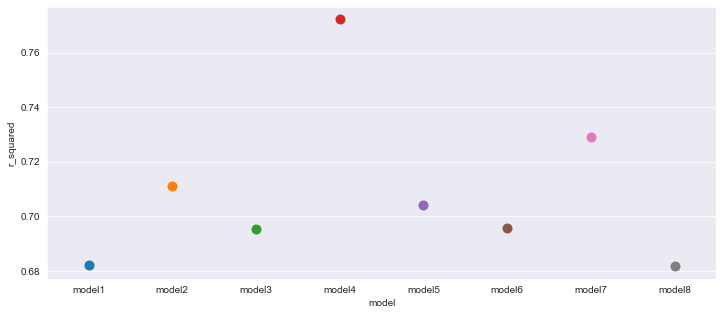

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.swarmplot(x='model',y='r_squared',data=rsqr_df,size=10)

### Prediction and evaluation on Model4

In [24]:
model4.params

Intercept      1.741987
np.log(slt)    0.597522
dtype: float64

In [25]:
predicted = np.exp(model4.predict(df1.slt))

<AxesSubplot:xlabel='dlt'>

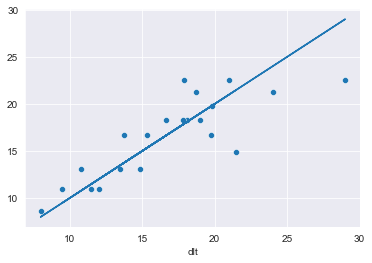

In [26]:
plt.plot(df1.dlt,df1.dlt)
sns.scatterplot(y=predicted, x=df1.dlt)

### Remove Outliers

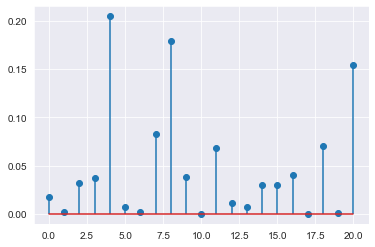

In [27]:
#calculate the cook distance
(c,_)= model4.get_influence().cooks_distance
plt.stem(range((df.shape[0])),c)
plt.show()

In [28]:
(np.argmax(c),np.max(c))

(4, 0.20461903316033653)

In [29]:
df1.drop(df1.index[4],axis=0,inplace=True)

In [30]:
# log transformation 

model = smf.ols('np.log(dlt)~np.log(slt)',data=df1).fit()
model.rsquared

0.7642919597254191

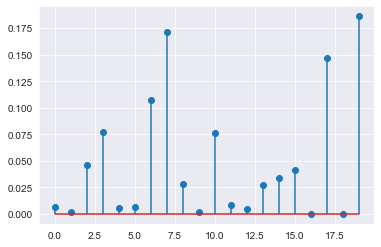

In [31]:
#again make cook distance
(c,_)=model.get_influence().cooks_distance
plt.stem(range(df1.shape[0]),c)
plt.show()

In [32]:
(np.argmax(c),np.max(c))

(19, 0.1861259793698411)

In [33]:
df1.drop(df1.index[19],axis=0,inplace=True)

In [34]:
# Recreate the model 

model = smf.ols('np.log(dlt)~np.log(slt)',data=df1).fit()
model.rsquared

0.8426984346949852

<AxesSubplot:xlabel='dlt'>

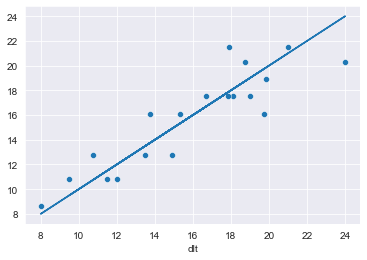

In [35]:
# Actual vs predicted
predicted = np.exp(model.predict(df1.slt))
plt.plot(df1.dlt,df1.dlt)
sns.scatterplot(y=predicted, x=df1.dlt)

In [36]:
model.params

Intercept      1.758184
np.log(slt)    0.569066
dtype: float64

In [37]:
model.summary()

C:\Users\shiva\anaconda3\envs\tf\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(dlt)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     91.07
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.06e-08
Time:                        23:25:15   Log-Likelihood:                 14.439
No. Observations:                  19   AIC:                            -24.88
Df Residuals:                      17   BIC:                            -22.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7582      0.105     16.700      0.000       1.536       1.980
np.log(slt)     0.5691      0.060      9.543      0.000       0.443       0.695
==============================================================================
Omnibus:                        0.982   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.742
Skew:                           0.024   Prob(JB):                        0.690
Kurtosis:                       2.033   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thank you!